In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#For doing linear regression
from sklearn.linear_model import LinearRegression

#For making synthetic datasets
from sklearn.datasets import make_regression
from sklearn.datasets import make_blobs

# Scatterplots for Occular Test of Linearity

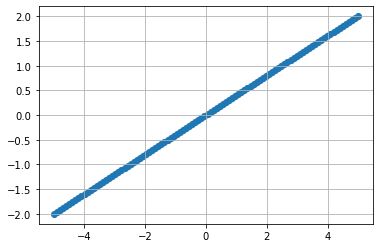

In [2]:
linear1x = np.linspace(-5,5, num=100).reshape(-1,1)
linear1y = np.linspace(-2,2, num=100) 
plt.scatter(linear1x,linear1y)
plt.grid(True)

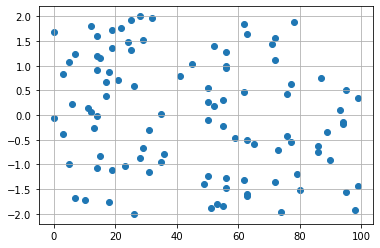

In [3]:
linear2x=np.random.randint(100, size=(100))
linear2y = np.linspace(-2,2, num=100)
plt.scatter(linear2x,linear2y)
plt.grid(True)

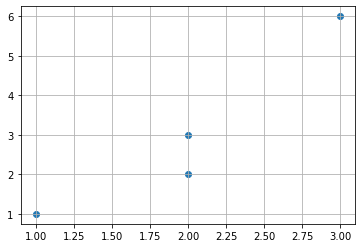

In [4]:
linear3x = [1,2,2,3]
linear3y = [1,2,3,6]
plt.scatter(linear3x,linear3y)
plt.grid(True)

(0.0, 70000.0)

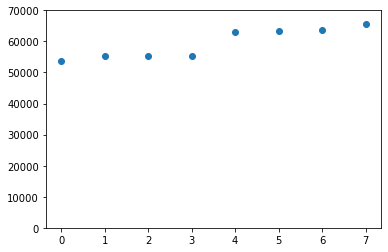

In [7]:
year = np.array([0,1,2,3,4,5,6,7]).reshape(-1,1)
income =np.array([53807,55217,55209,55415,63100,63206,63761,65766])
plt.scatter(year,income)
plt.ylim((0,70000))

Text(0, 0.5, 'Body Mass')

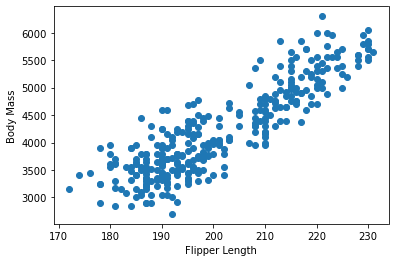

In [8]:
df = pd.read_csv('processed_penguins.csv')
#df.head()
flipper = np.array(df.flipper_length_mm).reshape(-1,1)
mass = df.body_mass_g
plt.scatter(flipper,mass)
plt.xlabel("Flipper Length")
plt.ylabel("Body Mass")

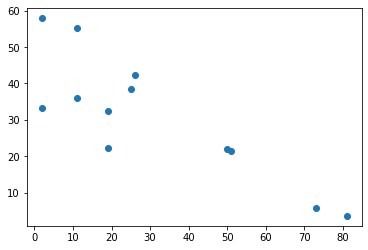

In [9]:
linear6x=np.array([50,11,2,19,26,73,81,51,11,2,19,25]).reshape(-1,1)
linear6y=[22.1,35.9,57.9,22.2,42.4,5.8,3.6,21.4,55.2,33.3,32.4,38.4]
plt.scatter(linear6x,linear6y)

# Performing Linear Regression w/Scikit-Learn

In [10]:
model1 = LinearRegression()
model1.fit(linear1x,linear1y)
model1.score(linear1x,linear1y)

1.0

In [11]:
model2 = LinearRegression()
linear2x = linear2x.reshape(-1,1)
model2.fit(linear2x,linear2y)
model2.score(linear2x,linear2y)

0.05231875536395669

In [12]:
model3 = LinearRegression()
linear3x = np.array(linear3x).reshape(-1,1)
model3.fit(linear3x,linear3y)
model3.score(linear3x,linear3y)

0.8928571428571429

In [13]:
model4 = LinearRegression()
model4.fit(year,income)
model4.score(year,income)

0.87563660998618

In [14]:
x_new = np.array([8,9,10,11,12,13,14,15]).reshape(-1,1)
y_new = model4.predict(x_new)
print(y_new)

[67905.25 69787.5  71669.75 73552.   75434.25 77316.5  79198.75 81081.  ]


In [15]:
print(model4.coef_,model4.intercept_)

[1882.25] 52847.25


$$ y=1882.25x + 52847.25 $$

In [16]:
prediction = model4.coef_*8+model4.intercept_
print(prediction)

[67905.25]


In [17]:
model5 = LinearRegression()
model5.fit(flipper,mass)
model5.score(flipper,mass)

0.7692449593460003

In [18]:
print(model5.coef_,model5.intercept_)

[50.84934701] -6017.73867019112


In [19]:
x_new = np.array([185,183,193,178]).reshape(-1,1)
y_new = model5.predict(x_new)
print(y_new)

[3389.39052715 3287.69183312 3796.18530325 3033.44509806]


In [20]:
model6 = LinearRegression()
model6.fit(linear6x,linear6y)
model6.score(linear6x,linear6y)

0.7212531656318837

In [21]:
print(model6.coef_,model6.intercept_)

[-0.53860907] 47.49044638689692


# Residuals Plots

In [ ]:
sns.regplot(x=flipper,y=mass)

In [ ]:
sns.residplot(x=flipper,y=mass)

# Multi Linear Regression

In [ ]:
df.columns

In [ ]:
X = np.array(df[['bill_length_mm','bill_depth_mm','flipper_length_mm']])
y = np.array(df['body_mass_g'])

In [ ]:
model7 = LinearRegression()
model7.fit(X,y)
model7.score(X,y)

In [ ]:
print(model7.coef_, model7.intercept_)

# Regression with statsmodels

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
reg = ols("body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm", data = df).fit()

In [ ]:
print(reg.summary())

# Regression Under the Hood

In [ ]:
x = np.arange(-2,2,.1)
y = np.arange(-2,2,.1)

In [ ]:
x

In [ ]:
xbar=x.mean()

In [ ]:
ybar=y.mean()

In [ ]:
plt.scatter(x,y)
plt.grid(True)

In [ ]:
np.sum((x-xbar)*(y-ybar))

In [ ]:
np.sum((x-xbar)**2)

In [ ]:
m = len(x)

In [ ]:
1/(2*m)

In [ ]:
theta0=0.0
theta1=10.0

In [ ]:
h_theta_x = theta0 + theta1*x

In [ ]:
q = h_theta_x-y
r = q**2

In [ ]:
plt.plot(q,r)
plt.plot(x, h_theta_x)
plt.grid(True)

In [ ]:
sum(r)*(1/(2*m))